In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import random
import time
import warnings; warnings.simplefilter('ignore')

In [2]:
# k = 2

def EqCons(eps,b):
    c = [{'type': 'eq', 'fun': lambda p: p[0]+p[1]-math.exp(eps[0]/b)/(math.exp(eps[0]/b)+1)},
        {'type': 'eq', 'fun': lambda p: p[0]+p[2]-math.exp(eps[1]/b)/(math.exp(eps[1]/b)+1)}]
    return c

def InEqCons(eps,b):
    c = [{'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[0]-math.exp(eps[0]/b)*p[2]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[0]-math.exp(eps[1]/b)*p[1]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[1]-math.exp(eps[0]/b)*p[3]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[2]-math.exp(eps[1]/b)*p[3]}]
    return c

def PrivacyLevel(eps,k,b):
    p0 = np.ones(2**k)*(1/(2**k))
    #print(p0)
    fun = lambda p: p[0]/p[int(2**k-1)]
    
    cons = [0]*(k+1+(2**(k-1))*k)
    cons[0:k] = EqCons(eps,b)
    cons[k] = {'type': 'eq', 'fun': lambda p: np.sum(p)-1}
    cons[k+1:k+1+(2**(k-1))*k] = InEqCons(eps,b)
    #print(cons)

    bnds = [(0,1)]*(2**k)
    
    res = minimize(fun, p0, bounds=bnds, constraints=cons)
    
    prod = 1
    for i in range(k):
        prod *= (math.exp(eps[i])/math.exp(eps[i]/b))
    return math.log(res.fun*prod)

In [3]:
k = 2

rt = np.zeros(6)
for i in range(20):
    eps = [random.random() for l in range(k)]
    s = time.time()
    PrivacyLevel(eps,k,1.6)
    e = time.time()
    rt[0] += e-s
rt[0] /= 20

In [4]:
# k = 3

def EqCons(eps,b):
    c = [{'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]-math.exp(eps[0]/b)/(math.exp(eps[0]/b)+1)},
        {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[4]+p[5]-math.exp(eps[1]/b)/(math.exp(eps[1]/b)+1)},
        {'type': 'eq', 'fun': lambda p: p[0]+p[2]+p[4]+p[6]-math.exp(eps[2]/b)/(math.exp(eps[2]/b)+1)}]
    return c

def InEqCons(eps,b):
    c = [{'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[0]-math.exp(eps[2]/b)*p[1]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[0]-math.exp(eps[1]/b)*p[2]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[0]-math.exp(eps[0]/b)*p[4]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[1]-math.exp(eps[1]/b)*p[3]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[1]-math.exp(eps[0]/b)*p[5]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[2]-math.exp(eps[2]/b)*p[3]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[2]-math.exp(eps[0]/b)*p[6]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[3]-math.exp(eps[0]/b)*p[7]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[4]-math.exp(eps[2]/b)*p[5]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[4]-math.exp(eps[1]/b)*p[6]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[5]-math.exp(eps[1]/b)*p[7]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[6]-math.exp(eps[2]/b)*p[7]}]
    return c

In [5]:
k = 3

for i in range(20):
    eps = [random.random() for l in range(k)]
    s = time.time()
    PrivacyLevel(eps,k,1.6)
    e = time.time()
    rt[1] += e-s
rt[1] /= 20

In [6]:
# k = 4

def EqCons(eps,b):
    c = [{'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[4]+p[5]+p[6]+p[7]-math.exp(eps[0]/b)/(math.exp(eps[0]/b)+1)},
        {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[8]+p[9]+p[10]+p[11]-math.exp(eps[1]/b)/(math.exp(eps[1]/b)+1)},
        {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[4]+p[5]+p[8]+p[9]+p[12]+p[13]-math.exp(eps[2]/b)/(math.exp(eps[2]/b)+1)},
        {'type': 'eq', 'fun': lambda p: p[0]+p[2]+p[4]+p[6]+p[8]+p[10]+p[12]+p[14]-math.exp(eps[3]/b)/(math.exp(eps[3]/b)+1)}]
    return c

def InEqCons(eps,b):
    c = [{'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[0]-math.exp(eps[3]/b)*p[1]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[0]-math.exp(eps[2]/b)*p[2]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[0]-math.exp(eps[1]/b)*p[4]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[0]-math.exp(eps[0]/b)*p[8]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[1]-math.exp(eps[2]/b)*p[3]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[1]-math.exp(eps[1]/b)*p[5]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[1]-math.exp(eps[0]/b)*p[9]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[2]-math.exp(eps[3]/b)*p[3]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[2]-math.exp(eps[1]/b)*p[6]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[2]-math.exp(eps[0]/b)*p[10]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[3]-math.exp(eps[1]/b)*p[7]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[3]-math.exp(eps[0]/b)*p[11]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[4]-math.exp(eps[3]/b)*p[5]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[4]-math.exp(eps[2]/b)*p[6]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[4]-math.exp(eps[0]/b)*p[12]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[5]-math.exp(eps[2]/b)*p[7]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[5]-math.exp(eps[0]/b)*p[13]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[6]-math.exp(eps[3]/b)*p[7]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[6]-math.exp(eps[0]/b)*p[14]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[7]-math.exp(eps[0]/b)*p[15]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[8]-math.exp(eps[3]/b)*p[9]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[8]-math.exp(eps[2]/b)*p[10]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[8]-math.exp(eps[1]/b)*p[12]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[9]-math.exp(eps[2]/b)*p[11]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[9]-math.exp(eps[1]/b)*p[13]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[10]-math.exp(eps[3]/b)*p[11]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[10]-math.exp(eps[1]/b)*p[14]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[11]-math.exp(eps[1]/b)*p[15]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[12]-math.exp(eps[3]/b)*p[13]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[12]-math.exp(eps[2]/b)*p[14]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[13]-math.exp(eps[2]/b)*p[15]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[14]-math.exp(eps[3]/b)*p[15]}]
    return c

In [7]:
k = 4

for i in range(20):
    eps = [random.random() for l in range(k)]
    s = time.time()
    PrivacyLevel(eps,k,1.6)
    e = time.time()
    rt[2] += e-s
rt[2] /= 20

In [8]:
# k = 5

def EqCons(eps,b):
    c = [{'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[4]+p[5]+p[6]+p[7]+p[8]+p[9]+p[10]+p[11]+p[12]+p[13]+p[14]+p[15]-math.exp(eps[0]/b)/(math.exp(eps[0]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[4]+p[5]+p[6]+p[7]+p[16]+p[17]+p[18]+p[19]+p[20]+p[21]+p[22]+p[23]-math.exp(eps[1]/b)/(math.exp(eps[1]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[8]+p[9]+p[10]+p[11]+p[16]+p[17]+p[18]+p[19]+p[24]+p[25]+p[26]+p[27]-math.exp(eps[2]/b)/(math.exp(eps[2]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[4]+p[5]+p[8]+p[9]+p[12]+p[13]+p[16]+p[17]+p[20]+p[21]+p[24]+p[25]+p[28]+p[29]-math.exp(eps[3]/b)/(math.exp(eps[3]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[2]+p[4]+p[6]+p[8]+p[10]+p[12]+p[14]+p[16]+p[18]+p[20]+p[22]+p[24]+p[26]+p[28]+p[30]-math.exp(eps[4]/b)/(math.exp(eps[4]/b)+1)}]    
    return c

def InEqCons(eps,b):
    c = [{'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[0]-math.exp(eps[4]/b)*p[1]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[0]-math.exp(eps[3]/b)*p[2]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[0]-math.exp(eps[2]/b)*p[4]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[0]-math.exp(eps[1]/b)*p[8]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[0]-math.exp(eps[0]/b)*p[16]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[1]-math.exp(eps[3]/b)*p[3]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[1]-math.exp(eps[2]/b)*p[5]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[1]-math.exp(eps[1]/b)*p[9]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[1]-math.exp(eps[0]/b)*p[17]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[2]-math.exp(eps[4]/b)*p[3]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[2]-math.exp(eps[2]/b)*p[6]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[2]-math.exp(eps[1]/b)*p[10]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[2]-math.exp(eps[0]/b)*p[18]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[3]-math.exp(eps[2]/b)*p[7]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[3]-math.exp(eps[1]/b)*p[11]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[3]-math.exp(eps[0]/b)*p[19]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[4]-math.exp(eps[4]/b)*p[5]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[4]-math.exp(eps[3]/b)*p[6]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[4]-math.exp(eps[1]/b)*p[12]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[4]-math.exp(eps[0]/b)*p[20]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[5]-math.exp(eps[3]/b)*p[7]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[5]-math.exp(eps[1]/b)*p[13]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[5]-math.exp(eps[0]/b)*p[21]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[6]-math.exp(eps[4]/b)*p[7]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[6]-math.exp(eps[1]/b)*p[14]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[6]-math.exp(eps[0]/b)*p[22]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[7]-math.exp(eps[1]/b)*p[15]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[7]-math.exp(eps[0]/b)*p[23]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[8]-math.exp(eps[4]/b)*p[9]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[8]-math.exp(eps[3]/b)*p[10]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[8]-math.exp(eps[2]/b)*p[12]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[8]-math.exp(eps[0]/b)*p[24]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[9]-math.exp(eps[3]/b)*p[11]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[9]-math.exp(eps[2]/b)*p[13]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[9]-math.exp(eps[0]/b)*p[25]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[10]-math.exp(eps[4]/b)*p[11]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[10]-math.exp(eps[2]/b)*p[14]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[10]-math.exp(eps[0]/b)*p[26]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[11]-math.exp(eps[2]/b)*p[15]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[11]-math.exp(eps[0]/b)*p[27]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[12]-math.exp(eps[4]/b)*p[13]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[12]-math.exp(eps[3]/b)*p[14]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[12]-math.exp(eps[0]/b)*p[28]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[13]-math.exp(eps[3]/b)*p[15]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[13]-math.exp(eps[0]/b)*p[29]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[14]-math.exp(eps[4]/b)*p[15]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[14]-math.exp(eps[0]/b)*p[30]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[15]-math.exp(eps[0]/b)*p[31]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[16]-math.exp(eps[4]/b)*p[17]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[16]-math.exp(eps[3]/b)*p[18]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[16]-math.exp(eps[2]/b)*p[20]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[16]-math.exp(eps[1]/b)*p[24]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[17]-math.exp(eps[3]/b)*p[19]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[17]-math.exp(eps[2]/b)*p[21]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[17]-math.exp(eps[1]/b)*p[25]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[18]-math.exp(eps[4]/b)*p[19]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[18]-math.exp(eps[2]/b)*p[22]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[18]-math.exp(eps[1]/b)*p[26]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[19]-math.exp(eps[2]/b)*p[23]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[19]-math.exp(eps[1]/b)*p[27]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[20]-math.exp(eps[4]/b)*p[21]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[20]-math.exp(eps[3]/b)*p[22]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[20]-math.exp(eps[1]/b)*p[28]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[21]-math.exp(eps[3]/b)*p[23]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[21]-math.exp(eps[1]/b)*p[29]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[22]-math.exp(eps[4]/b)*p[23]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[22]-math.exp(eps[1]/b)*p[30]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[23]-math.exp(eps[1]/b)*p[31]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[24]-math.exp(eps[4]/b)*p[25]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[24]-math.exp(eps[3]/b)*p[26]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[24]-math.exp(eps[2]/b)*p[28]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[25]-math.exp(eps[3]/b)*p[27]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[25]-math.exp(eps[2]/b)*p[29]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[26]-math.exp(eps[4]/b)*p[27]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[26]-math.exp(eps[2]/b)*p[30]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[27]-math.exp(eps[2]/b)*p[31]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[28]-math.exp(eps[4]/b)*p[29]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[28]-math.exp(eps[3]/b)*p[30]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[29]-math.exp(eps[3]/b)*p[31]},
        {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[30]-math.exp(eps[4]/b)*p[31]}
        ]
    return c

In [9]:
k = 5

for i in range(20):
    eps = [random.random() for l in range(k)]
    s = time.time()
    PrivacyLevel(eps,k,1.6)
    e = time.time()
    rt[3] += e-s
rt[3] /= 20

In [10]:
# k = 6

def EqCons(eps,b):
    c = [{'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[4]+p[5]+p[6]+p[7]+p[8]+p[9]+p[10]+p[11]+p[12]+p[13]+p[14]+p[15]+p[16]+p[17]+p[18]+p[19]+p[20]+p[21]+p[22]+p[23]+p[24]+p[25]+p[26]+p[27]+p[28]+p[29]+p[30]+p[31]-math.exp(eps[0]/b)/(math.exp(eps[0]/b)+1)},
        {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[4]+p[5]+p[6]+p[7]+p[8]+p[9]+p[10]+p[11]+p[12]+p[13]+p[14]+p[15]+p[32]+p[33]+p[34]+p[35]+p[36]+p[37]+p[38]+p[39]+p[40]+p[41]+p[42]+p[43]+p[44]+p[45]+p[46]+p[47]-math.exp(eps[1]/b)/(math.exp(eps[1]/b)+1)},
        {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[4]+p[5]+p[6]+p[7]+p[16]+p[17]+p[18]+p[19]+p[20]+p[21]+p[22]+p[23]+p[32]+p[33]+p[34]+p[35]+p[36]+p[37]+p[38]+p[39]+p[48]+p[49]+p[50]+p[51]+p[52]+p[53]+p[54]+p[55]-math.exp(eps[2]/b)/(math.exp(eps[2]/b)+1)},
        {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[8]+p[9]+p[10]+p[11]+p[16]+p[17]+p[18]+p[19]+p[24]+p[25]+p[26]+p[27]+p[32]+p[33]+p[34]+p[35]+p[40]+p[41]+p[42]+p[43]+p[48]+p[49]+p[50]+p[51]+p[56]+p[57]+p[58]+p[59]-math.exp(eps[3]/b)/(math.exp(eps[3]/b)+1)},
        {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[4]+p[5]+p[8]+p[9]+p[12]+p[13]+p[16]+p[17]+p[20]+p[21]+p[24]+p[25]+p[28]+p[29]+p[32]+p[33]+p[36]+p[37]+p[40]+p[41]+p[44]+p[45]+p[48]+p[49]+p[52]+p[53]+p[56]+p[57]+p[60]+p[61]-math.exp(eps[4]/b)/(math.exp(eps[4]/b)+1)},
        {'type': 'eq', 'fun': lambda p: p[0]+p[2]+p[4]+p[6]+p[8]+p[10]+p[12]+p[14]+p[16]+p[18]+p[20]+p[22]+p[24]+p[26]+p[28]+p[30]+p[32]+p[34]+p[36]+p[38]+p[40]+p[42]+p[44]+p[46]+p[48]+p[50]+p[52]+p[54]+p[56]+p[58]+p[60]+p[62]-math.exp(eps[5]/b)/(math.exp(eps[5]/b)+1)}]
    return c

def InEqCons(eps,b):
    c = [{'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[0]-math.exp(eps[5]/b)*p[1]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[0]-math.exp(eps[4]/b)*p[2]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[0]-math.exp(eps[3]/b)*p[4]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[0]-math.exp(eps[2]/b)*p[8]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[0]-math.exp(eps[1]/b)*p[16]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[0]-math.exp(eps[0]/b)*p[32]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[1]-math.exp(eps[4]/b)*p[3]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[1]-math.exp(eps[3]/b)*p[5]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[1]-math.exp(eps[2]/b)*p[9]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[1]-math.exp(eps[1]/b)*p[17]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[1]-math.exp(eps[0]/b)*p[33]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[2]-math.exp(eps[5]/b)*p[3]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[2]-math.exp(eps[3]/b)*p[6]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[2]-math.exp(eps[2]/b)*p[10]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[2]-math.exp(eps[1]/b)*p[18]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[2]-math.exp(eps[0]/b)*p[34]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[3]-math.exp(eps[3]/b)*p[7]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[3]-math.exp(eps[2]/b)*p[11]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[3]-math.exp(eps[1]/b)*p[19]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[3]-math.exp(eps[0]/b)*p[35]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[4]-math.exp(eps[5]/b)*p[5]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[4]-math.exp(eps[4]/b)*p[6]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[4]-math.exp(eps[2]/b)*p[12]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[4]-math.exp(eps[1]/b)*p[20]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[4]-math.exp(eps[0]/b)*p[36]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[5]-math.exp(eps[4]/b)*p[7]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[5]-math.exp(eps[2]/b)*p[13]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[5]-math.exp(eps[1]/b)*p[21]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[5]-math.exp(eps[0]/b)*p[37]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[6]-math.exp(eps[5]/b)*p[7]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[6]-math.exp(eps[2]/b)*p[14]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[6]-math.exp(eps[1]/b)*p[22]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[6]-math.exp(eps[0]/b)*p[38]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[7]-math.exp(eps[2]/b)*p[15]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[7]-math.exp(eps[1]/b)*p[23]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[7]-math.exp(eps[0]/b)*p[39]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[8]-math.exp(eps[5]/b)*p[9]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[8]-math.exp(eps[4]/b)*p[10]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[8]-math.exp(eps[3]/b)*p[12]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[8]-math.exp(eps[1]/b)*p[24]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[8]-math.exp(eps[0]/b)*p[40]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[9]-math.exp(eps[4]/b)*p[11]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[9]-math.exp(eps[3]/b)*p[13]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[9]-math.exp(eps[1]/b)*p[25]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[9]-math.exp(eps[0]/b)*p[41]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[10]-math.exp(eps[5]/b)*p[11]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[10]-math.exp(eps[3]/b)*p[14]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[10]-math.exp(eps[1]/b)*p[26]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[10]-math.exp(eps[0]/b)*p[42]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[11]-math.exp(eps[3]/b)*p[15]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[11]-math.exp(eps[1]/b)*p[27]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[11]-math.exp(eps[0]/b)*p[43]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[12]-math.exp(eps[5]/b)*p[13]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[12]-math.exp(eps[4]/b)*p[14]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[12]-math.exp(eps[1]/b)*p[28]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[12]-math.exp(eps[0]/b)*p[44]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[13]-math.exp(eps[4]/b)*p[15]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[13]-math.exp(eps[1]/b)*p[29]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[13]-math.exp(eps[0]/b)*p[45]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[14]-math.exp(eps[5]/b)*p[15]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[14]-math.exp(eps[1]/b)*p[30]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[14]-math.exp(eps[0]/b)*p[46]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[15]-math.exp(eps[1]/b)*p[31]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[15]-math.exp(eps[0]/b)*p[47]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[16]-math.exp(eps[5]/b)*p[17]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[16]-math.exp(eps[4]/b)*p[18]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[16]-math.exp(eps[3]/b)*p[20]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[16]-math.exp(eps[2]/b)*p[24]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[16]-math.exp(eps[0]/b)*p[48]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[17]-math.exp(eps[4]/b)*p[19]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[17]-math.exp(eps[3]/b)*p[21]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[17]-math.exp(eps[2]/b)*p[25]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[17]-math.exp(eps[0]/b)*p[49]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[18]-math.exp(eps[5]/b)*p[19]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[18]-math.exp(eps[3]/b)*p[22]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[18]-math.exp(eps[2]/b)*p[26]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[18]-math.exp(eps[0]/b)*p[50]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[19]-math.exp(eps[3]/b)*p[23]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[19]-math.exp(eps[2]/b)*p[27]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[19]-math.exp(eps[0]/b)*p[51]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[20]-math.exp(eps[5]/b)*p[21]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[20]-math.exp(eps[4]/b)*p[22]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[20]-math.exp(eps[2]/b)*p[28]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[20]-math.exp(eps[0]/b)*p[52]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[21]-math.exp(eps[4]/b)*p[23]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[21]-math.exp(eps[2]/b)*p[29]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[21]-math.exp(eps[0]/b)*p[53]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[22]-math.exp(eps[5]/b)*p[23]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[22]-math.exp(eps[2]/b)*p[30]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[22]-math.exp(eps[0]/b)*p[53]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[23]-math.exp(eps[2]/b)*p[31]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[23]-math.exp(eps[0]/b)*p[55]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[24]-math.exp(eps[5]/b)*p[25]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[24]-math.exp(eps[4]/b)*p[26]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[24]-math.exp(eps[3]/b)*p[28]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[24]-math.exp(eps[0]/b)*p[56]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[25]-math.exp(eps[4]/b)*p[27]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[25]-math.exp(eps[3]/b)*p[29]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[25]-math.exp(eps[0]/b)*p[57]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[26]-math.exp(eps[5]/b)*p[27]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[26]-math.exp(eps[3]/b)*p[30]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[26]-math.exp(eps[0]/b)*p[58]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[27]-math.exp(eps[3]/b)*p[31]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[27]-math.exp(eps[0]/b)*p[59]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[28]-math.exp(eps[5]/b)*p[29]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[28]-math.exp(eps[4]/b)*p[30]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[28]-math.exp(eps[0]/b)*p[60]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[29]-math.exp(eps[4]/b)*p[31]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[29]-math.exp(eps[0]/b)*p[61]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[30]-math.exp(eps[5]/b)*p[31]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[30]-math.exp(eps[0]/b)*p[62]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[31]-math.exp(eps[0]/b)*p[63]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[32]-math.exp(eps[5]/b)*p[33]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[32]-math.exp(eps[4]/b)*p[34]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[32]-math.exp(eps[3]/b)*p[36]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[32]-math.exp(eps[2]/b)*p[40]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[32]-math.exp(eps[1]/b)*p[48]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[33]-math.exp(eps[4]/b)*p[35]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[33]-math.exp(eps[3]/b)*p[37]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[33]-math.exp(eps[2]/b)*p[41]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[33]-math.exp(eps[1]/b)*p[49]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[34]-math.exp(eps[5]/b)*p[35]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[34]-math.exp(eps[3]/b)*p[38]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[34]-math.exp(eps[2]/b)*p[42]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[34]-math.exp(eps[1]/b)*p[50]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[35]-math.exp(eps[3]/b)*p[39]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[35]-math.exp(eps[2]/b)*p[43]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[35]-math.exp(eps[1]/b)*p[51]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[36]-math.exp(eps[5]/b)*p[37]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[36]-math.exp(eps[4]/b)*p[38]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[36]-math.exp(eps[2]/b)*p[44]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[36]-math.exp(eps[1]/b)*p[52]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[37]-math.exp(eps[4]/b)*p[39]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[37]-math.exp(eps[2]/b)*p[45]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[37]-math.exp(eps[1]/b)*p[53]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[38]-math.exp(eps[5]/b)*p[39]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[38]-math.exp(eps[2]/b)*p[46]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[38]-math.exp(eps[1]/b)*p[54]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[39]-math.exp(eps[2]/b)*p[47]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[39]-math.exp(eps[1]/b)*p[55]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[40]-math.exp(eps[5]/b)*p[41]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[40]-math.exp(eps[4]/b)*p[42]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[40]-math.exp(eps[3]/b)*p[44]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[40]-math.exp(eps[1]/b)*p[56]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[41]-math.exp(eps[4]/b)*p[43]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[41]-math.exp(eps[3]/b)*p[45]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[41]-math.exp(eps[1]/b)*p[57]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[42]-math.exp(eps[5]/b)*p[43]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[42]-math.exp(eps[3]/b)*p[46]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[42]-math.exp(eps[1]/b)*p[58]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[43]-math.exp(eps[3]/b)*p[47]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[43]-math.exp(eps[1]/b)*p[59]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[44]-math.exp(eps[5]/b)*p[45]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[44]-math.exp(eps[4]/b)*p[46]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[44]-math.exp(eps[1]/b)*p[60]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[45]-math.exp(eps[4]/b)*p[47]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[45]-math.exp(eps[1]/b)*p[61]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[46]-math.exp(eps[5]/b)*p[47]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[46]-math.exp(eps[1]/b)*p[62]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[47]-math.exp(eps[1]/b)*p[63]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[48]-math.exp(eps[5]/b)*p[49]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[48]-math.exp(eps[4]/b)*p[50]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[48]-math.exp(eps[3]/b)*p[52]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[48]-math.exp(eps[2]/b)*p[56]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[49]-math.exp(eps[4]/b)*p[51]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[49]-math.exp(eps[3]/b)*p[53]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[49]-math.exp(eps[2]/b)*p[57]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[50]-math.exp(eps[5]/b)*p[51]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[50]-math.exp(eps[3]/b)*p[54]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[50]-math.exp(eps[2]/b)*p[58]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[51]-math.exp(eps[3]/b)*p[55]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[51]-math.exp(eps[2]/b)*p[59]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[52]-math.exp(eps[5]/b)*p[53]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[52]-math.exp(eps[4]/b)*p[54]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[52]-math.exp(eps[2]/b)*p[60]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[53]-math.exp(eps[4]/b)*p[55]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[53]-math.exp(eps[2]/b)*p[61]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[54]-math.exp(eps[5]/b)*p[55]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[54]-math.exp(eps[2]/b)*p[62]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[55]-math.exp(eps[2]/b)*p[63]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[56]-math.exp(eps[5]/b)*p[57]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[56]-math.exp(eps[4]/b)*p[58]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[56]-math.exp(eps[3]/b)*p[60]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[57]-math.exp(eps[4]/b)*p[59]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[57]-math.exp(eps[3]/b)*p[61]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[58]-math.exp(eps[5]/b)*p[59]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[58]-math.exp(eps[3]/b)*p[62]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[59]-math.exp(eps[3]/b)*p[63]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[60]-math.exp(eps[5]/b)*p[61]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[60]-math.exp(eps[4]/b)*p[62]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[61]-math.exp(eps[4]/b)*p[63]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[62]-math.exp(eps[5]/b)*p[63]}
        ]
    return c

In [11]:
k = 6

for i in range(20):
    eps = [random.random() for l in range(k)]
    s = time.time()
    PrivacyLevel(eps,k,1.6)
    e = time.time()
    rt[4] += e-s
rt[4] /= 20

In [12]:
# k = 7

def EqCons(eps,b):
    c = [{'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[4]+p[5]+p[6]+p[7]+p[8]+p[9]+p[10]+p[11]+p[12]+p[13]+p[14]+p[15]+p[16]+p[17]+p[18]+p[19]+p[20]+p[21]+p[22]+p[23]+p[24]+p[25]+p[26]+p[27]+p[28]+p[29]+p[30]+p[31]+p[32]+p[33]+p[34]+p[35]+p[36]+p[37]+p[38]+p[39]+p[40]+p[41]+p[42]+p[43]+p[44]+p[45]+p[46]+p[47]+p[48]+p[49]+p[50]+p[51]+p[52]+p[53]+p[54]+p[55]+p[56]+p[57]+p[58]+p[59]+p[60]+p[61]+p[62]+p[63]-math.exp(eps[0]/b)/(math.exp(eps[0]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[4]+p[5]+p[6]+p[7]+p[8]+p[9]+p[10]+p[11]+p[12]+p[13]+p[14]+p[15]+p[16]+p[17]+p[18]+p[19]+p[20]+p[21]+p[22]+p[23]+p[24]+p[25]+p[26]+p[27]+p[28]+p[29]+p[30]+p[31]+p[64]+p[65]+p[66]+p[67]+p[68]+p[69]+p[70]+p[71]+p[72]+p[73]+p[74]+p[75]+p[76]+p[77]+p[78]+p[79]+p[80]+p[81]+p[82]+p[83]+p[84]+p[85]+p[86]+p[87]+p[88]+p[89]+p[90]+p[91]+p[92]+p[93]+p[94]+p[95]-math.exp(eps[1]/b)/(math.exp(eps[1]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[4]+p[5]+p[6]+p[7]+p[8]+p[9]+p[10]+p[11]+p[12]+p[13]+p[14]+p[15]+p[32]+p[33]+p[34]+p[35]+p[36]+p[37]+p[38]+p[39]+p[40]+p[41]+p[42]+p[43]+p[44]+p[45]+p[46]+p[47]+p[64]+p[65]+p[66]+p[67]+p[68]+p[69]+p[70]+p[71]+p[72]+p[73]+p[74]+p[75]+p[76]+p[77]+p[78]+p[79]+p[96]+p[97]+p[98]+p[99]+p[100]+p[101]+p[102]+p[103]+p[104]+p[105]+p[106]+p[107]+p[108]+p[109]+p[110]+p[111]-math.exp(eps[2]/b)/(math.exp(eps[2]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[4]+p[5]+p[6]+p[7]+p[16]+p[17]+p[18]+p[19]+p[20]+p[21]+p[22]+p[23]+p[32]+p[33]+p[34]+p[35]+p[36]+p[37]+p[38]+p[39]+p[48]+p[49]+p[50]+p[51]+p[52]+p[53]+p[54]+p[55]+p[64]+p[65]+p[66]+p[67]+p[68]+p[69]+p[70]+p[71]+p[80]+p[81]+p[82]+p[83]+p[84]+p[85]+p[86]+p[87]+p[96]+p[97]+p[98]+p[99]+p[100]+p[101]+p[102]+p[103]+p[112]+p[113]+p[114]+p[115]+p[116]+p[117]+p[118]+p[119]-math.exp(eps[3]/b)/(math.exp(eps[3]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[2]+p[3]+p[8]+p[9]+p[10]+p[11]+p[16]+p[17]+p[18]+p[19]+p[24]+p[25]+p[26]+p[27]+p[32]+p[33]+p[34]+p[35]+p[40]+p[41]+p[42]+p[43]+p[48]+p[49]+p[50]+p[51]+p[56]+p[57]+p[58]+p[59]+p[64]+p[65]+p[66]+p[67]+p[72]+p[73]+p[74]+p[75]+p[80]+p[81]+p[82]+p[83]+p[88]+p[89]+p[90]+p[91]+p[96]+p[97]+p[98]+p[99]+p[104]+p[105]+p[106]+p[107]+p[112]+p[113]+p[114]+p[115]+p[120]+p[121]+p[122]+p[123]-math.exp(eps[4]/b)/(math.exp(eps[4]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[1]+p[4]+p[5]+p[8]+p[9]+p[12]+p[13]+p[16]+p[17]+p[20]+p[21]+p[24]+p[25]+p[28]+p[29]+p[32]+p[33]+p[36]+p[37]+p[40]+p[41]+p[44]+p[45]+p[48]+p[49]+p[52]+p[53]+p[56]+p[57]+p[60]+p[61]+p[64]+p[65]+p[68]+p[69]+p[72]+p[73]+p[76]+p[77]+p[80]+p[81]+p[84]+p[85]+p[88]+p[89]+p[92]+p[93]+p[96]+p[97]+p[100]+p[101]+p[104]+p[105]+p[108]+p[109]+p[112]+p[113]+p[116]+p[117]+p[120]+p[121]+p[124]+p[125]-math.exp(eps[5]/b)/(math.exp(eps[5]/b)+1)},
         {'type': 'eq', 'fun': lambda p: p[0]+p[2]+p[4]+p[6]+p[8]+p[10]+p[12]+p[14]+p[16]+p[18]+p[20]+p[22]+p[24]+p[26]+p[28]+p[30]+p[32]+p[34]+p[36]+p[38]+p[40]+p[42]+p[44]+p[46]+p[48]+p[50]+p[52]+p[54]+p[56]+p[58]+p[60]+p[62]+p[64]+p[66]+p[68]+p[70]+p[72]+p[74]+p[76]+p[78]+p[80]+p[82]+p[84]+p[86]+p[88]+p[90]+p[92]+p[94]+p[96]+p[98]+p[100]+p[102]+p[104]+p[106]+p[108]+p[110]+p[112]+p[114]+p[116]+p[118]+p[120]+p[122]+p[124]+p[126]-math.exp(eps[6]/b)/(math.exp(eps[6]/b)+1)},
        ]
    return c

def InEqCons(eps,b):
    c = [{'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[0]-math.exp(eps[6]/b)*p[1]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[0]-math.exp(eps[5]/b)*p[2]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[0]-math.exp(eps[4]/b)*p[4]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[0]-math.exp(eps[3]/b)*p[8]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[0]-math.exp(eps[2]/b)*p[16]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[0]-math.exp(eps[1]/b)*p[32]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[0]-math.exp(eps[0]/b)*p[64]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[1]-math.exp(eps[5]/b)*p[3]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[1]-math.exp(eps[4]/b)*p[5]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[1]-math.exp(eps[3]/b)*p[9]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[1]-math.exp(eps[2]/b)*p[17]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[1]-math.exp(eps[1]/b)*p[33]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[1]-math.exp(eps[0]/b)*p[65]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[2]-math.exp(eps[6]/b)*p[3]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[2]-math.exp(eps[4]/b)*p[6]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[2]-math.exp(eps[3]/b)*p[10]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[2]-math.exp(eps[2]/b)*p[18]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[2]-math.exp(eps[1]/b)*p[34]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[2]-math.exp(eps[0]/b)*p[66]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[3]-math.exp(eps[4]/b)*p[7]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[3]-math.exp(eps[3]/b)*p[11]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[3]-math.exp(eps[2]/b)*p[19]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[3]-math.exp(eps[1]/b)*p[35]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[3]-math.exp(eps[0]/b)*p[67]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[4]-math.exp(eps[6]/b)*p[5]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[4]-math.exp(eps[5]/b)*p[6]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[4]-math.exp(eps[3]/b)*p[12]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[4]-math.exp(eps[2]/b)*p[20]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[4]-math.exp(eps[1]/b)*p[36]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[4]-math.exp(eps[0]/b)*p[68]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[5]-math.exp(eps[5]/b)*p[7]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[5]-math.exp(eps[3]/b)*p[13]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[5]-math.exp(eps[2]/b)*p[21]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[5]-math.exp(eps[1]/b)*p[37]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[5]-math.exp(eps[0]/b)*p[69]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[6]-math.exp(eps[6]/b)*p[7]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[6]-math.exp(eps[3]/b)*p[14]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[6]-math.exp(eps[2]/b)*p[22]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[6]-math.exp(eps[1]/b)*p[38]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[6]-math.exp(eps[0]/b)*p[70]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[7]-math.exp(eps[3]/b)*p[15]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[7]-math.exp(eps[2]/b)*p[23]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[7]-math.exp(eps[1]/b)*p[39]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[7]-math.exp(eps[0]/b)*p[71]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[8]-math.exp(eps[6]/b)*p[9]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[8]-math.exp(eps[5]/b)*p[10]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[8]-math.exp(eps[4]/b)*p[12]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[8]-math.exp(eps[2]/b)*p[24]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[8]-math.exp(eps[1]/b)*p[40]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[8]-math.exp(eps[0]/b)*p[72]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[9]-math.exp(eps[5]/b)*p[11]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[9]-math.exp(eps[4]/b)*p[13]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[9]-math.exp(eps[2]/b)*p[25]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[9]-math.exp(eps[1]/b)*p[41]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[9]-math.exp(eps[0]/b)*p[73]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[10]-math.exp(eps[6]/b)*p[11]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[10]-math.exp(eps[4]/b)*p[14]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[10]-math.exp(eps[2]/b)*p[26]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[10]-math.exp(eps[1]/b)*p[42]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[10]-math.exp(eps[0]/b)*p[74]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[11]-math.exp(eps[4]/b)*p[15]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[11]-math.exp(eps[2]/b)*p[27]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[11]-math.exp(eps[1]/b)*p[43]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[11]-math.exp(eps[0]/b)*p[75]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[12]-math.exp(eps[6]/b)*p[13]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[12]-math.exp(eps[5]/b)*p[14]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[12]-math.exp(eps[2]/b)*p[28]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[12]-math.exp(eps[1]/b)*p[44]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[12]-math.exp(eps[0]/b)*p[76]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[13]-math.exp(eps[5]/b)*p[15]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[13]-math.exp(eps[2]/b)*p[29]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[13]-math.exp(eps[1]/b)*p[45]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[13]-math.exp(eps[0]/b)*p[77]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[14]-math.exp(eps[6]/b)*p[15]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[14]-math.exp(eps[2]/b)*p[30]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[14]-math.exp(eps[1]/b)*p[46]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[14]-math.exp(eps[0]/b)*p[78]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[15]-math.exp(eps[2]/b)*p[31]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[15]-math.exp(eps[1]/b)*p[47]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[15]-math.exp(eps[0]/b)*p[79]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[16]-math.exp(eps[6]/b)*p[17]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[16]-math.exp(eps[5]/b)*p[18]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[16]-math.exp(eps[4]/b)*p[20]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[16]-math.exp(eps[3]/b)*p[24]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[16]-math.exp(eps[1]/b)*p[48]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[16]-math.exp(eps[0]/b)*p[80]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[17]-math.exp(eps[5]/b)*p[19]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[17]-math.exp(eps[4]/b)*p[21]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[17]-math.exp(eps[3]/b)*p[25]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[17]-math.exp(eps[1]/b)*p[49]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[17]-math.exp(eps[0]/b)*p[81]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[18]-math.exp(eps[6]/b)*p[19]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[18]-math.exp(eps[4]/b)*p[22]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[18]-math.exp(eps[3]/b)*p[26]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[18]-math.exp(eps[1]/b)*p[50]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[18]-math.exp(eps[0]/b)*p[82]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[19]-math.exp(eps[4]/b)*p[23]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[19]-math.exp(eps[3]/b)*p[27]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[19]-math.exp(eps[1]/b)*p[51]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[19]-math.exp(eps[0]/b)*p[83]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[20]-math.exp(eps[6]/b)*p[21]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[20]-math.exp(eps[5]/b)*p[22]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[20]-math.exp(eps[3]/b)*p[28]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[20]-math.exp(eps[1]/b)*p[52]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[20]-math.exp(eps[0]/b)*p[84]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[21]-math.exp(eps[5]/b)*p[23]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[21]-math.exp(eps[3]/b)*p[29]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[21]-math.exp(eps[1]/b)*p[53]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[21]-math.exp(eps[0]/b)*p[85]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[22]-math.exp(eps[6]/b)*p[23]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[22]-math.exp(eps[3]/b)*p[30]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[22]-math.exp(eps[1]/b)*p[54]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[22]-math.exp(eps[0]/b)*p[86]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[23]-math.exp(eps[3]/b)*p[31]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[23]-math.exp(eps[1]/b)*p[55]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[23]-math.exp(eps[0]/b)*p[87]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[24]-math.exp(eps[6]/b)*p[25]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[24]-math.exp(eps[5]/b)*p[26]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[24]-math.exp(eps[4]/b)*p[28]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[24]-math.exp(eps[1]/b)*p[56]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[24]-math.exp(eps[0]/b)*p[88]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[25]-math.exp(eps[5]/b)*p[27]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[25]-math.exp(eps[4]/b)*p[29]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[25]-math.exp(eps[1]/b)*p[57]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[25]-math.exp(eps[0]/b)*p[89]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[26]-math.exp(eps[6]/b)*p[27]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[26]-math.exp(eps[4]/b)*p[30]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[26]-math.exp(eps[1]/b)*p[58]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[26]-math.exp(eps[0]/b)*p[90]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[27]-math.exp(eps[4]/b)*p[31]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[27]-math.exp(eps[1]/b)*p[59]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[27]-math.exp(eps[0]/b)*p[91]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[28]-math.exp(eps[6]/b)*p[29]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[28]-math.exp(eps[5]/b)*p[30]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[28]-math.exp(eps[1]/b)*p[60]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[28]-math.exp(eps[0]/b)*p[92]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[29]-math.exp(eps[5]/b)*p[31]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[29]-math.exp(eps[1]/b)*p[61]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[29]-math.exp(eps[0]/b)*p[93]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[30]-math.exp(eps[6]/b)*p[31]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[30]-math.exp(eps[1]/b)*p[62]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[30]-math.exp(eps[0]/b)*p[94]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[31]-math.exp(eps[1]/b)*p[63]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[31]-math.exp(eps[0]/b)*p[95]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[32]-math.exp(eps[6]/b)*p[33]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[32]-math.exp(eps[5]/b)*p[34]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[32]-math.exp(eps[4]/b)*p[36]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[32]-math.exp(eps[3]/b)*p[40]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[32]-math.exp(eps[2]/b)*p[48]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[32]-math.exp(eps[0]/b)*p[96]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[33]-math.exp(eps[5]/b)*p[35]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[33]-math.exp(eps[4]/b)*p[37]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[33]-math.exp(eps[3]/b)*p[41]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[33]-math.exp(eps[2]/b)*p[49]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[33]-math.exp(eps[0]/b)*p[97]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[34]-math.exp(eps[6]/b)*p[35]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[34]-math.exp(eps[4]/b)*p[38]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[34]-math.exp(eps[3]/b)*p[42]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[34]-math.exp(eps[2]/b)*p[50]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[34]-math.exp(eps[0]/b)*p[98]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[35]-math.exp(eps[4]/b)*p[39]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[35]-math.exp(eps[3]/b)*p[43]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[35]-math.exp(eps[2]/b)*p[51]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[35]-math.exp(eps[0]/b)*p[99]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[36]-math.exp(eps[6]/b)*p[37]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[36]-math.exp(eps[5]/b)*p[38]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[36]-math.exp(eps[3]/b)*p[44]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[36]-math.exp(eps[2]/b)*p[52]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[36]-math.exp(eps[0]/b)*p[100]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[37]-math.exp(eps[5]/b)*p[39]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[37]-math.exp(eps[3]/b)*p[45]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[37]-math.exp(eps[2]/b)*p[53]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[37]-math.exp(eps[0]/b)*p[101]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[38]-math.exp(eps[6]/b)*p[39]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[38]-math.exp(eps[3]/b)*p[46]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[38]-math.exp(eps[2]/b)*p[54]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[38]-math.exp(eps[0]/b)*p[102]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[39]-math.exp(eps[3]/b)*p[47]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[39]-math.exp(eps[2]/b)*p[55]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[39]-math.exp(eps[0]/b)*p[103]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[40]-math.exp(eps[6]/b)*p[41]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[40]-math.exp(eps[5]/b)*p[42]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[40]-math.exp(eps[4]/b)*p[44]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[40]-math.exp(eps[2]/b)*p[56]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[40]-math.exp(eps[0]/b)*p[104]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[41]-math.exp(eps[5]/b)*p[43]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[41]-math.exp(eps[4]/b)*p[45]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[41]-math.exp(eps[2]/b)*p[57]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[41]-math.exp(eps[0]/b)*p[105]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[42]-math.exp(eps[6]/b)*p[43]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[42]-math.exp(eps[4]/b)*p[46]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[42]-math.exp(eps[2]/b)*p[58]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[42]-math.exp(eps[0]/b)*p[106]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[43]-math.exp(eps[4]/b)*p[47]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[43]-math.exp(eps[2]/b)*p[59]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[43]-math.exp(eps[0]/b)*p[107]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[44]-math.exp(eps[6]/b)*p[45]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[44]-math.exp(eps[5]/b)*p[46]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[44]-math.exp(eps[2]/b)*p[60]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[44]-math.exp(eps[0]/b)*p[108]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[45]-math.exp(eps[5]/b)*p[47]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[45]-math.exp(eps[2]/b)*p[61]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[45]-math.exp(eps[0]/b)*p[109]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[46]-math.exp(eps[6]/b)*p[47]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[46]-math.exp(eps[2]/b)*p[62]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[46]-math.exp(eps[0]/b)*p[110]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[47]-math.exp(eps[2]/b)*p[63]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[47]-math.exp(eps[0]/b)*p[111]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[48]-math.exp(eps[6]/b)*p[49]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[48]-math.exp(eps[5]/b)*p[50]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[48]-math.exp(eps[4]/b)*p[52]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[48]-math.exp(eps[3]/b)*p[56]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[48]-math.exp(eps[0]/b)*p[112]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[49]-math.exp(eps[5]/b)*p[51]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[49]-math.exp(eps[4]/b)*p[53]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[49]-math.exp(eps[3]/b)*p[57]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[49]-math.exp(eps[0]/b)*p[113]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[50]-math.exp(eps[6]/b)*p[51]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[50]-math.exp(eps[4]/b)*p[54]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[50]-math.exp(eps[3]/b)*p[58]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[50]-math.exp(eps[0]/b)*p[114]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[51]-math.exp(eps[4]/b)*p[55]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[51]-math.exp(eps[3]/b)*p[59]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[51]-math.exp(eps[0]/b)*p[115]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[52]-math.exp(eps[6]/b)*p[53]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[52]-math.exp(eps[5]/b)*p[54]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[52]-math.exp(eps[3]/b)*p[60]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[52]-math.exp(eps[0]/b)*p[116]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[53]-math.exp(eps[5]/b)*p[55]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[53]-math.exp(eps[3]/b)*p[61]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[53]-math.exp(eps[0]/b)*p[117]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[54]-math.exp(eps[6]/b)*p[55]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[54]-math.exp(eps[3]/b)*p[62]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[54]-math.exp(eps[0]/b)*p[118]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[55]-math.exp(eps[3]/b)*p[63]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[55]-math.exp(eps[0]/b)*p[119]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[56]-math.exp(eps[6]/b)*p[57]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[56]-math.exp(eps[5]/b)*p[58]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[56]-math.exp(eps[4]/b)*p[60]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[56]-math.exp(eps[0]/b)*p[120]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[57]-math.exp(eps[5]/b)*p[59]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[57]-math.exp(eps[4]/b)*p[61]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[57]-math.exp(eps[0]/b)*p[121]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[58]-math.exp(eps[6]/b)*p[59]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[58]-math.exp(eps[4]/b)*p[62]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[58]-math.exp(eps[0]/b)*p[122]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[59]-math.exp(eps[4]/b)*p[63]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[59]-math.exp(eps[0]/b)*p[123]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[60]-math.exp(eps[6]/b)*p[61]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[60]-math.exp(eps[5]/b)*p[62]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[60]-math.exp(eps[0]/b)*p[124]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[61]-math.exp(eps[5]/b)*p[63]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[61]-math.exp(eps[0]/b)*p[125]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[62]-math.exp(eps[6]/b)*p[63]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[62]-math.exp(eps[0]/b)*p[126]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[0])*p[63]-math.exp(eps[0]/b)*p[127]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[64]-math.exp(eps[6]/b)*p[65]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[64]-math.exp(eps[5]/b)*p[66]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[64]-math.exp(eps[4]/b)*p[68]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[64]-math.exp(eps[3]/b)*p[72]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[64]-math.exp(eps[2]/b)*p[80]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[64]-math.exp(eps[1]/b)*p[96]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[65]-math.exp(eps[5]/b)*p[67]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[65]-math.exp(eps[4]/b)*p[69]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[65]-math.exp(eps[3]/b)*p[73]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[65]-math.exp(eps[2]/b)*p[81]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[65]-math.exp(eps[1]/b)*p[97]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[66]-math.exp(eps[6]/b)*p[67]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[66]-math.exp(eps[4]/b)*p[70]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[66]-math.exp(eps[3]/b)*p[74]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[66]-math.exp(eps[2]/b)*p[82]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[66]-math.exp(eps[1]/b)*p[98]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[67]-math.exp(eps[4]/b)*p[71]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[67]-math.exp(eps[3]/b)*p[75]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[67]-math.exp(eps[2]/b)*p[83]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[67]-math.exp(eps[1]/b)*p[99]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[68]-math.exp(eps[6]/b)*p[69]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[68]-math.exp(eps[5]/b)*p[70]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[68]-math.exp(eps[3]/b)*p[76]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[68]-math.exp(eps[2]/b)*p[84]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[68]-math.exp(eps[1]/b)*p[100]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[69]-math.exp(eps[5]/b)*p[71]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[69]-math.exp(eps[3]/b)*p[77]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[69]-math.exp(eps[2]/b)*p[85]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[69]-math.exp(eps[1]/b)*p[101]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[70]-math.exp(eps[6]/b)*p[71]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[70]-math.exp(eps[4]/b)*p[78]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[70]-math.exp(eps[3]/b)*p[86]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[70]-math.exp(eps[1]/b)*p[102]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[71]-math.exp(eps[3]/b)*p[79]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[71]-math.exp(eps[2]/b)*p[87]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[71]-math.exp(eps[1]/b)*p[103]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[72]-math.exp(eps[6]/b)*p[73]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[72]-math.exp(eps[5]/b)*p[74]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[72]-math.exp(eps[4]/b)*p[76]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[72]-math.exp(eps[2]/b)*p[88]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[72]-math.exp(eps[1]/b)*p[104]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[73]-math.exp(eps[5]/b)*p[75]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[73]-math.exp(eps[4]/b)*p[77]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[73]-math.exp(eps[2]/b)*p[89]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[73]-math.exp(eps[1]/b)*p[105]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[74]-math.exp(eps[6]/b)*p[75]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[74]-math.exp(eps[4]/b)*p[78]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[74]-math.exp(eps[2]/b)*p[90]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[74]-math.exp(eps[1]/b)*p[106]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[75]-math.exp(eps[4]/b)*p[79]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[75]-math.exp(eps[2]/b)*p[91]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[75]-math.exp(eps[1]/b)*p[107]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[76]-math.exp(eps[6]/b)*p[77]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[76]-math.exp(eps[5]/b)*p[78]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[76]-math.exp(eps[2]/b)*p[92]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[76]-math.exp(eps[1]/b)*p[108]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[77]-math.exp(eps[5]/b)*p[79]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[77]-math.exp(eps[2]/b)*p[93]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[77]-math.exp(eps[1]/b)*p[109]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[78]-math.exp(eps[6]/b)*p[79]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[78]-math.exp(eps[2]/b)*p[94]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[78]-math.exp(eps[1]/b)*p[110]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[79]-math.exp(eps[2]/b)*p[95]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[79]-math.exp(eps[1]/b)*p[111]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[80]-math.exp(eps[6]/b)*p[81]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[80]-math.exp(eps[5]/b)*p[82]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[80]-math.exp(eps[4]/b)*p[84]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[80]-math.exp(eps[3]/b)*p[88]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[80]-math.exp(eps[1]/b)*p[112]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[81]-math.exp(eps[5]/b)*p[83]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[81]-math.exp(eps[4]/b)*p[85]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[81]-math.exp(eps[3]/b)*p[89]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[81]-math.exp(eps[1]/b)*p[113]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[82]-math.exp(eps[6]/b)*p[83]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[82]-math.exp(eps[4]/b)*p[86]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[82]-math.exp(eps[3]/b)*p[90]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[82]-math.exp(eps[1]/b)*p[114]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[83]-math.exp(eps[4]/b)*p[87]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[83]-math.exp(eps[3]/b)*p[91]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[83]-math.exp(eps[1]/b)*p[115]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[84]-math.exp(eps[6]/b)*p[85]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[84]-math.exp(eps[5]/b)*p[86]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[84]-math.exp(eps[3]/b)*p[92]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[84]-math.exp(eps[1]/b)*p[115]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[85]-math.exp(eps[5]/b)*p[87]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[85]-math.exp(eps[3]/b)*p[93]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[85]-math.exp(eps[1]/b)*p[117]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[86]-math.exp(eps[6]/b)*p[87]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[86]-math.exp(eps[3]/b)*p[94]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[86]-math.exp(eps[1]/b)*p[118]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[87]-math.exp(eps[3]/b)*p[95]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[87]-math.exp(eps[1]/b)*p[119]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[88]-math.exp(eps[6]/b)*p[89]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[88]-math.exp(eps[5]/b)*p[90]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[88]-math.exp(eps[4]/b)*p[92]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[88]-math.exp(eps[1]/b)*p[120]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[89]-math.exp(eps[5]/b)*p[91]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[89]-math.exp(eps[4]/b)*p[93]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[89]-math.exp(eps[1]/b)*p[121]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[90]-math.exp(eps[6]/b)*p[91]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[90]-math.exp(eps[4]/b)*p[94]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[90]-math.exp(eps[1]/b)*p[122]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[91]-math.exp(eps[4]/b)*p[95]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[91]-math.exp(eps[1]/b)*p[123]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[92]-math.exp(eps[6]/b)*p[93]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[92]-math.exp(eps[5]/b)*p[94]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[92]-math.exp(eps[1]/b)*p[124]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[93]-math.exp(eps[5]/b)*p[95]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[93]-math.exp(eps[1]/b)*p[125]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[94]-math.exp(eps[6]/b)*p[95]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[94]-math.exp(eps[1]/b)*p[126]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[1])*p[95]-math.exp(eps[1]/b)*p[127]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[96]-math.exp(eps[6]/b)*p[97]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[96]-math.exp(eps[5]/b)*p[98]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[96]-math.exp(eps[4]/b)*p[100]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[96]-math.exp(eps[3]/b)*p[104]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[96]-math.exp(eps[2]/b)*p[112]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[97]-math.exp(eps[5]/b)*p[99]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[97]-math.exp(eps[4]/b)*p[101]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[97]-math.exp(eps[3]/b)*p[105]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[97]-math.exp(eps[2]/b)*p[113]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[98]-math.exp(eps[6]/b)*p[99]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[98]-math.exp(eps[4]/b)*p[102]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[98]-math.exp(eps[3]/b)*p[106]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[98]-math.exp(eps[2]/b)*p[114]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[99]-math.exp(eps[4]/b)*p[103]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[99]-math.exp(eps[3]/b)*p[107]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[99]-math.exp(eps[2]/b)*p[115]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[100]-math.exp(eps[6]/b)*p[101]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[100]-math.exp(eps[5]/b)*p[102]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[100]-math.exp(eps[3]/b)*p[108]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[100]-math.exp(eps[2]/b)*p[116]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[101]-math.exp(eps[5]/b)*p[103]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[101]-math.exp(eps[3]/b)*p[109]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[101]-math.exp(eps[2]/b)*p[117]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[102]-math.exp(eps[6]/b)*p[103]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[102]-math.exp(eps[3]/b)*p[110]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[102]-math.exp(eps[2]/b)*p[118]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[103]-math.exp(eps[3]/b)*p[111]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[103]-math.exp(eps[2]/b)*p[119]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[104]-math.exp(eps[6]/b)*p[105]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[104]-math.exp(eps[5]/b)*p[106]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[104]-math.exp(eps[4]/b)*p[108]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[104]-math.exp(eps[2]/b)*p[120]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[105]-math.exp(eps[5]/b)*p[107]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[105]-math.exp(eps[4]/b)*p[109]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[105]-math.exp(eps[2]/b)*p[121]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[106]-math.exp(eps[6]/b)*p[107]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[106]-math.exp(eps[4]/b)*p[110]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[106]-math.exp(eps[2]/b)*p[122]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[107]-math.exp(eps[4]/b)*p[111]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[107]-math.exp(eps[2]/b)*p[123]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[108]-math.exp(eps[6]/b)*p[109]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[108]-math.exp(eps[5]/b)*p[110]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[108]-math.exp(eps[2]/b)*p[124]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[109]-math.exp(eps[5]/b)*p[111]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[109]-math.exp(eps[2]/b)*p[125]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[110]-math.exp(eps[6]/b)*p[111]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[110]-math.exp(eps[2]/b)*p[126]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[2])*p[111]-math.exp(eps[2]/b)*p[127]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[112]-math.exp(eps[6]/b)*p[113]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[112]-math.exp(eps[5]/b)*p[114]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[112]-math.exp(eps[4]/b)*p[116]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[112]-math.exp(eps[3]/b)*p[120]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[113]-math.exp(eps[5]/b)*p[115]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[113]-math.exp(eps[4]/b)*p[117]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[113]-math.exp(eps[3]/b)*p[121]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[114]-math.exp(eps[6]/b)*p[115]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[114]-math.exp(eps[4]/b)*p[118]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[114]-math.exp(eps[3]/b)*p[122]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[115]-math.exp(eps[4]/b)*p[119]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[115]-math.exp(eps[3]/b)*p[123]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[116]-math.exp(eps[6]/b)*p[117]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[116]-math.exp(eps[5]/b)*p[118]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[116]-math.exp(eps[3]/b)*p[124]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[117]-math.exp(eps[5]/b)*p[119]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[117]-math.exp(eps[3]/b)*p[125]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[118]-math.exp(eps[6]/b)*p[119]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[118]-math.exp(eps[3]/b)*p[126]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[3])*p[119]-math.exp(eps[3]/b)*p[127]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[120]-math.exp(eps[6]/b)*p[121]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[120]-math.exp(eps[5]/b)*p[122]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[120]-math.exp(eps[4]/b)*p[124]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[121]-math.exp(eps[5]/b)*p[123]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[121]-math.exp(eps[4]/b)*p[125]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[122]-math.exp(eps[6]/b)*p[123]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[122]-math.exp(eps[4]/b)*p[126]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[4])*p[123]-math.exp(eps[4]/b)*p[127]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[124]-math.exp(eps[6]/b)*p[125]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[124]-math.exp(eps[5]/b)*p[126]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[5])*p[125]-math.exp(eps[5]/b)*p[127]},
         {'type': 'ineq', 'fun': lambda p: math.exp(eps[6])*p[126]-math.exp(eps[6]/b)*p[127]}
        ]
    return c

In [13]:
k = 7

for i in range(20):
    eps = [random.random() for l in range(k)]
    s = time.time()
    PrivacyLevel(eps,k,1.6)
    e = time.time()
    rt[5] += e-s
rt[5] /= 20

[0.00455062 0.01105326 0.02663929 0.08970273 0.35303322 1.61487077]


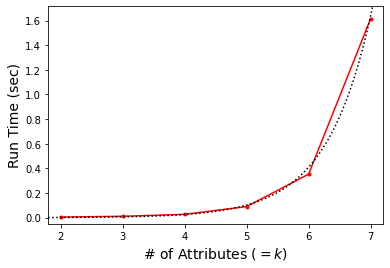

In [14]:
print(rt)

k = [2,3,4,5,6,7]

x = np.linspace(1.8,7.2,100)
y = 2**(2*x)/10000

fig = plt.figure()
plt.ylim(-0.05, max(rt)+0.1)
plt.xlim(1.8,7.2)
plt.plot(k,rt,marker=".",color="red",linestyle = "-")
plt.plot(x,y,color = "black", linestyle = "dotted")
plt.xlabel("# of Attributes $(= k)$",fontsize=14)
plt.ylabel("Run Time (sec)",fontsize=14)
fig.savefig("RunTime.png")
fig.savefig("figs/RunTime.eps")